In [1]:
# 기본 라이브러리 불러오기
from scipy.misc import imread
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, ImageColorGenerator
import os
import pandas as pd

In [28]:
# 파일 이름으로 데이터 불러와서 컬럼명 바꿔주고, 날짜 바꿔주는 함수
# 
def read_data(filename):
    colnames = ['nickname', 'id', 'date', 'tweet']
    path_twt = 'c:/python/workshopd/tweets/'
    data = pd.read_excel(path_twt + filename, header = 0)
    data.columns = colnames
    data['date'] = pd.to_datetime(data['date'], format = '%Y년 %m월 %d일')
    data.reset_index(inplace = True)
    data.drop(['index'], axis = 1, inplace = True)
    return data

In [36]:
# 
def read_data2(filename):
    colnames = ['nickname', 'id', 'date', 'tweet']
    path_twt = 'c:/python/workshopd/tweets/'
    data = pd.read_excel(path_twt + filename, header = 0)
    data.columns = colnames
    data.reset_index(inplace = True)
    data.drop(['index'], axis = 1, inplace = True)
    return data

In [197]:
data = read_data2('세월호_2014-04-19.xlsx')

In [199]:
data['tweet']

0                            [오마이포토] 세월호 실종자 가족, 청와대로 행진 
1       獨 권위지 FAZ, 세월호 사고 박근혜에 치명타 -정부의 운명 때론 비정치 사건에서...
2       "잠수부들 수백명이 세월호 선내로 들어가 수색했다" 는 등 보도가 난무했지만, 피해...
3       국회에제출된법안들잠수시키는 데 이골이난국해의원들이국민 안전관련 법안들을 잠수시키는것...
4       세월호 침몰사고는 국정원이 사주한 사고일 가능성 높다  http://durl.me/...
5       꼭 들어 보세요 [트위터매거진] 새가 날아든다 - 8회2부.세월호침몰(with신상철...
6       암초도 없고, 날씨도 맑고, 파도도 잔잔하고, 수차례 다녀본 익숙한 바닷길이고! 근...
7       내용이 띄엄띄엄 있는것같습니다. 뭘 그렇게 숨기는게 많은지...[세월호 침몰] 충격...
8       <여객선침몰> 세월호 조타실에선 어떤 일이…(종합2보) http://me2.do/G...
9       세월호 관련 잠수함 음모론관련 돌아다니는 사진은 말이 안되는게 잠수함이 찍혔다는 사...
10      일본쓰나미사태,원전사태랑 세월호사태 비교해보니까 http://www.ilbe.com...
11      선장이나 ..박근혜나...무슨차이?...[세월호 참사]"못 믿을 정부" 폭발한 가족...
12      청와대로 행진하는 세월호 피해자 가족: http://ln.is/youtu.be/Iu...
13      항로이탈 ㅡ 하부터치ㅡ침수시작.ㅡ급선희 중  조타불능'.?"@moonlover333...
14          <여객선침몰> '나홀로 탈출' 세월호 선장 http://zul.im/02oQPO 
15      실시간 세월호 현장 링크 널리 공유해 주세요 http://m.ustream.tv/c...
16      "@snimwj: 새누리당 해산해라 단독]세월호 외면, 새누리당 폭탄주 술판 ‘충격...
17      <여객선 세

In [229]:
import re
regex = r'[가-힣]+'    # 한글만 모조리 불러오자

%timeit
a = []
for i in range(5):
    a.append(' '.join(data['tweet'].map(lambda x: re.findall(regex, x))[i]))

In [243]:
a = data['tweet'].map(lambda x: ' '.join(re.findall(regex, x)))

In [248]:
' '.join(a)

'오마이포토 세월호 실종자 가족 청와대로 행진 권위지 세월호 사고 박근혜에 치명타 정부의 운명 때론 비정치 사건에서 결정 국정원 조작 사건 사과 후 터진 악재 정부의 운명은 때로는 정치와 전혀 연관되지 않는 사건들에 의해 결정된다 잠수부들 수백명이 세월호 선내로 들어가 수색했다 는 등 보도가 난무했지만 피해자 가족들이 확인한 결과 이는 사실무근으로 급물살 가시거리등의 이유로 실제로는 잠수부 명정도씩 교대로 작업하고 있었다한다 그나마 작업상황 촬영한 영상 보여주지도 않고 국회에제출된법안들잠수시키는 데 이골이난국해의원들이국민 안전관련 법안들을 잠수시키는것을좋아하는데 왜진도앞바다에잠수하지않고죄없는 어린학생들이탄세월호가 침몰하였는지 안타깝다 대국회에 제출된 국민안전관련법안들을국해의원들이 깊은잠수를태웠다 김민상 세월호 침몰사고는 국정원이 사주한 사고일 가능성 높다 같은 꿈을 꾸고 있었네 꼭 들어 보세요 트위터매거진 새가 날아든다 회 부 세월호침몰 신상철 암초도 없고 날씨도 맑고 파도도 잔잔하고 수차례 다녀본 익숙한 바닷길이고 근데 왜 세월호는 급선회를 했을까 초보운전자가 도대체 무엇에 놀래서 급선회를 했을까 내용이 띄엄띄엄 있는것같습니다 뭘 그렇게 숨기는게 많은지 세월호 침몰 충격적인 마지막 교신 내용 여객선침몰 세월호 조타실에선 어떤 일이 종합 보 출처 네이버 뉴스 세월호 관련 잠수함 음모론관련 돌아다니는 사진은 말이 안되는게 잠수함이 찍혔다는 사진에 세월호는 완전히 뒤집혀있다 즉 침몰한지 꽤 시간이 지났다는 소린데 그때까지 주위에 어슬렁 거렸어야 말이 되는 주장 음모론들이 너무 천안함과 엮이는 것 같다 일본쓰나미사태 원전사태랑 세월호사태 비교해보니까 정말 좋은글이다 선장이나 박근혜나 무슨차이 세월호 참사 못 믿을 정부 폭발한 가족들 국가 재난대응 도마 미디어다음 청와대로 행진하는 세월호 피해자 가족 님이 씀 항로이탈 하부터치 침수시작 급선희 중 조타불능 신상철 서프라이즈 대표 세월호 침몰 의혹 인터뷰 국민 뉴스 모바일 여객선침몰 나홀로 탈출 세월호 선장 실시간 세월

In [249]:
Twitter().pos(a, stem = True, norm = True)

RuntimeError: No matching overloads found. at native\common\jp_method.cpp:121

In [194]:
import re
from konlpy.tag import Twitter

def get_twts(filename):
    data = read_data(filename)
    regex = r'[가-힣]+'    # 한글만 모조리 불러오자
    processed_twt = '\n'.join(re.findall(regex, str(data['tweet'])))
    twt_pos = Twitter().pos(processed_twt, norm = True, stem = True)
    stop_words = ['세월호', '참사', '유가족']
    twt_noun = [''.join(k) for (k, v) in twt_pos if v == 'Noun' and len(k) > 1 and k not in stop_words]
    return ' '.join(twt_noun)

In [ ]:
def get_twts2(filename):
    data = read_data2(filename)
    regex = r'[가-힣]+'    # 한글만 모조리 불러오자
    processed_twt = '\n'.join(re.findall(regex, str(data['tweet'])))
    twt_pos = Twitter().pos(processed_twt, norm = True, stem = True)
    twt_noun = [''.join(k) for (k, v) in twt_pos]
    return twt_noun

In [196]:
get_twts2('세월호_2014-04-19.xlsx')

['오마이',
 '포토',
 '세월호',
 '실종자',
 '가족',
 '청와대로',
 '행진',
 '권위',
 '지',
 '세월호',
 '사고',
 '박근혜',
 '에',
 '치명',
 '타',
 '정부',
 '의',
 '운명',
 '때론',
 '비',
 '정치',
 '사건',
 '에서',
 '잠수부',
 '들',
 '수백',
 '명',
 '이',
 '세월호',
 '서다',
 '들어가다',
 '수색',
 '하다',
 '늘다',
 '등',
 '보도',
 '가',
 '난무',
 '했지만',
 '피해',
 '국회',
 '에',
 '제출',
 '되다',
 '법안',
 '들',
 '잠수',
 '시키다',
 '데',
 '이골',
 '이',
 '난국',
 '해',
 '의원',
 '들',
 '이',
 '국민',
 '안전',
 '관련',
 '법안',
 '들',
 '을',
 '잠수',
 '시키다',
 '세월호',
 '침몰',
 '사고',
 '는',
 '국정원',
 '이',
 '사주',
 '한',
 '사고',
 '일',
 '가능성',
 '높다',
 '꼭',
 '들다',
 '보다',
 '트위터',
 '매다',
 '새',
 '가',
 '날',
 '아든',
 '다',
 '회',
 '부',
 '세월호',
 '침몰',
 '신상철',
 '암초',
 '도',
 '없다',
 '날씨',
 '도',
 '맑다',
 '파도',
 '도',
 '잔잔',
 '하고',
 '수',
 '차례',
 '다니다',
 '보다',
 '익숙하다',
 '바닷',
 '길이',
 '고',
 '근',
 '내용',
 '이',
 '띄엄띄엄',
 '있다',
 '같다',
 '뭘',
 '그렇게',
 '숨기다',
 '많다',
 '세월호',
 '침몰',
 '충격',
 '여객선',
 '침몰',
 '세월호',
 '조타다',
 '어떻다',
 '일이',
 '종합',
 '보',
 '세월호',
 '관련',
 '잠수함',
 '음모론',
 '관련',
 '돌아다니다',
 '사진',
 '은',
 '말',
 '이',
 '안',
 '되다',
 '잠수함',
 '이

In [32]:
from collections import Counter

In [33]:
path_twts = 'c:/python/workshopd/tweets/'
os.listdir(path_twts)

['20141020.xlsx',
 '20141021.xlsx',
 '20141022.xlsx',
 '20141023.xlsx',
 '20141024.xlsx',
 '20141025.xlsx',
 '20141026.xlsx',
 '20141027.xlsx',
 '20141029.xlsx',
 '20141030.xlsx',
 '20141101.xlsx',
 '20141102.xlsx',
 '20141103.xlsx',
 '20141104.xlsx',
 '20141105.xlsx',
 '20141106.xlsx',
 '20141107.xlsx',
 '20141109.xlsx',
 '20141110.xlsx',
 '20141111.xlsx',
 '20141112.xlsx',
 '20141113.xlsx',
 '20141114.xlsx',
 '20141115.xlsx',
 '20141116.xlsx',
 '20141117.xlsx',
 '20160104.xlsx',
 '20160105.xlsx',
 '20160106.xlsx',
 '20160107.xlsx',
 '20160108.xlsx',
 '20160109.xlsx',
 '20160110.xlsx',
 '20160111.xlsx',
 '20160112.xlsx',
 '20160113.xlsx',
 '20160114.xlsx',
 '20160115.xlsx',
 '20160116.xlsx',
 '20160117.xlsx',
 '세월호_2014-04-16.xlsx',
 '세월호_2014-04-17.xlsx',
 '세월호_2014-04-18 .xlsx',
 '세월호_2014-04-19 .xlsx',
 '세월호_2014-04-20 .xlsx',
 '세월호_2014-04-21 .xlsx',
 '세월호_2014-04-22 .xlsx',
 '세월호_2014-04-23 .xlsx',
 '세월호_2015-04-09 .xlsx',
 '세월호_2015-04-10 .xlsx',
 '세월호_2015-04-11 .xlsx',
 '세월호_2

In [174]:
import random

def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

def draw_wc(filename, logo_name):
    path_logo = 'c:/python/workshopd/sewol logos/'
    # logo = imread(path_logo + logo_name + '.jpg')
    # image_color = ImageColorGenerator(logo)
    data = get_twts(filename)
    wc = WordCloud(width = 1920, height = 1280, font_path = "C:\Windows\Fonts\YoonGothic750.otf",
               background_color = "white", ranks_only = True,
               color_func = grey_color_func, max_words = 500)
    wc.generate(data)
    plt.axis('off')
    plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3))
    return wc.to_file(filename[:-5] + '.png')




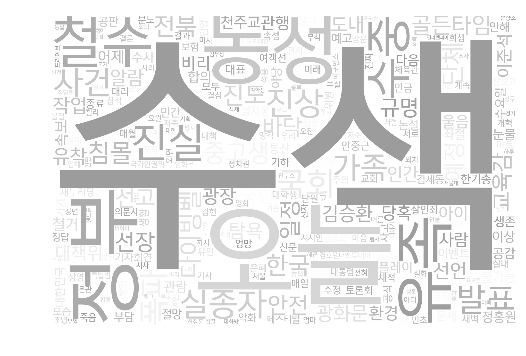

In [175]:
draw_wc('20141110.xlsx', 'color base')

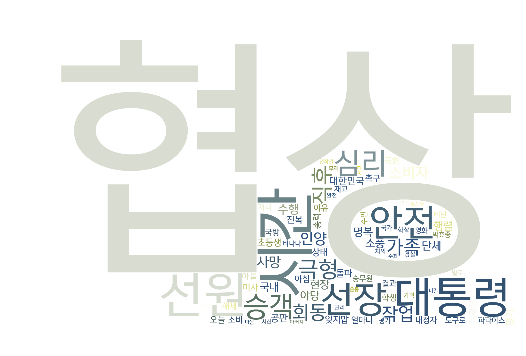

In [158]:
draw_wc('20141027.xlsx', '세월호1')

In [150]:
def draw_wc3(filename):
    data = get_twts(filename)
    wc = WordCloud(width = 1920, height = 1280, font_path = "C:\Windows\Fonts\YoonGothic750.otf",
               background_color = "white", ranks_only = False, margin = 10,
               max_words = 500)
    wc.generate(data)
    plt.axis('off')
    plt.imshow(wc)
    return plt.savefig(filename[:-5] + '.svg', format = 'svg')

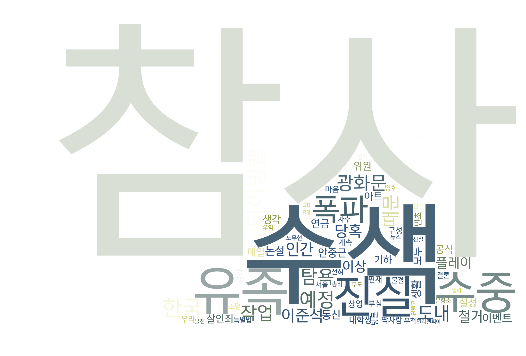

In [151]:
draw_wc('20141110.xlsx', '세월호1')

In [45]:
import os
path = 'C:/python/workshopd/tweets/'
files = os.listdir(path)

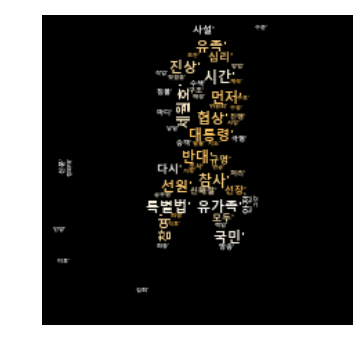

In [19]:

path_logo = 'c:/python/workshopd/sewol logos/'
logo1 = imread(path_logo + '세월호3.jpg')

image_color1 = ImageColorGenerator(logo1)

twt_pos3 = get_twts('20141027.xlsx')

wc1 = WordCloud(width = 1920, height = 1280, font_path="C:\Windows\Fonts\맑은고딕\malgunbd.ttf",
               background_color = "black", mask = logo1, ranks_only = True,
               color_func = image_color1, max_font_size = 10, max_words = 500)
wc1.generate(twt_pos3)
plt.axis('off')
plt.imshow(wc1)